# Notebook Title

## Setup Python and R environment
you can ignore this section

In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

During startup - Warning messages:
1: Setting LC_COLLATE failed, using "C" 
2: Setting LC_TIME failed, using "C" 
3: Setting LC_MESSAGES failed, using "C" 
4: Setting LC_MONETARY failed, using "C" 


In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
%%R

# My commonly used R imports

require('tidyverse')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: tidyverse


## Load & Clean Data

👉 Load the data along with the census connectors below (the output of the `connect-to-census.ipynb` notebook) and do any cleanup you'd like to do.

In [5]:
import pandas as pd

In [11]:
df_tobacco = pd.read_csv('active_tobacco_retailers_final2.csv', dtype={'census_tract': str})
df_tobacco['census_tract'] = df_tobacco['census_tract'].apply(lambda x: x[:-1])
df_tobacco

,LOCAL.HEALTH.UNIT,OPERATION.NAME,CITY,STATE,ZIP,MUNICIPALITY,COUNTY,VENDOR.TYPE,CREATION.DATE,LOCATION,LAT,LONG,ADDRESS,census_code,census_tract
0,NYC,2918 GAS CORP,BRONX,NY,10469,BRONX,NEW YORK CITY,OTHER,07/10/2023,"2918 BOSTON ROAD BRONX, NY 10469 (40.868058834...",40.868059,-73.858776,"2918 BOSTON ROAD BRONX, NY 10469",360050342002008,36005034200
1,NYC,SHISHA KING CORP,BROOKLYN,NY,11207,BROOKLYN,NEW YORK CITY,GROCERY SUPERMARKET,07/10/2023,"656 SUTTER AVENUE BROOKLYN, NY 11207 (40.66938...",40.669383,-73.894472,"656 SUTTER AVENUE BROOKLYN, NY 11207",360471156001001,36047115600
2,NYC,TUNI'S SERVICE CORP,BROOKLYN,NY,11215,BROOKLYN,NEW YORK CITY,CONVENIENCE STORE,07/10/2023,"306 18TH STREET BROOKLYN, NY 11215 (40.6617226...",40.661723,-73.989688,"306 18TH STREET BROOKLYN, NY 11215",360470143002001,36047014300
3,NYC,"VISHWA NEWS, INC.",BROOKLYN,NY,11201,BROOKLYN,NEW YORK CITY,STAND,07/10/2023,"17 BOND STREET BROOKLYN, NY 11201 (40.68917313...",40.689173,-73.983154,"17 BOND STREET BROOKLYN, NY 11201",360470037001002,36047003700
4,NYC,JAMAST HOLDING CORP,FLUSHING,NY,11358,QUEENS,NEW YORK CITY,CONVENIENCE STORE,07/10/2023,"161-17 29TH AVENUE FLUSHING, NY 11358 (40.7714...",40.771400,-73.802776,"161-17 29TH AVENUE FLUSHING, NY 11358",360811059004015,36081105900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5464,NYC,BULLPEN DELI INC,BRONX,NY,10451,BRONX,NEW YORK CITY,GROCERY SUPERMARKET,07/10/2023,"66 EAST 161ST STREET BRONX, NY 10451 (40.82737...",40.827372,-73.925434,"66 EAST 161ST STREET BRONX, NY 10451",360050063011003,36005006301
5465,NYC,HI MANGO 1055 INC,BROOKLYN,NY,11237,BROOKLYN,NEW YORK CITY,GROCERY SUPERMARKET,07/10/2023,"1055 FLUSHING AVENUE BROOKLYN, NY 11237 (40.70...",40.704307,-73.930115,"1055 FLUSHING AVENUE BROOKLYN, NY 11237",360470453002013,36047045300
5466,NYC,GREEN GARDEN 1 DELI CORP,BROOKLYN,NY,11229,BROOKLYN,NEW YORK CITY,CONVENIENCE STORE,07/10/2023,"2801 NOSTRAND AVENUE BROOKLYN, NY 11229 (40.61...",40.615752,-73.944714,"2801 NOSTRAND AVENUE BROOKLYN, NY 11229",360470644001002,36047064400
5467,NYC,DOPEBOYS EXOTIC INC,BROOKLYN,NY,11210,BROOKLYN,NEW YORK CITY,GROCERY SUPERMARKET,07/10/2023,"1437 FLATBUSH AVENUE BROOKLYN, NY 11210 (40.63...",40.635654,-73.950397,"1437 FLATBUSH AVENUE BROOKLYN, NY 11210",360470786011002,36047078601


In [12]:
df_tobacco_count = df_tobacco.groupby('census_tract').size().reset_index(name='counts')
df_tobacco_count

,census_tract,counts
0,36005000200,2
1,36005000400,4
2,36005001600,2
3,36005001901,1
4,36005001902,2
...,...,...
1692,36113070603,6
1693,36113070604,3
1694,36113070701,15
1695,36113070702,2


## 👉 Grab Census Data

1. loading the Census API key

In [4]:
import dotenv

# Load the environment variables
# (loads CENSUS_API_KEY from .env)
dotenv.load_dotenv()


True

In [5]:
%%R 

require('tidycensus')

# because it an environment variable, we don't have to 
# explicitly pass this string to R, it is readable here
# in this R cell.
census_api_key(Sys.getenv("CENSUS_API_KEY"))

Loading required package: tidycensus
To install your API key for use in future sessions, run this function with `install = TRUE`.


2. Decide which Census variables you want

    Use <https://censusreporter.org/> to figure out which tables you want. (if censusreporter is down, check out the code in the cell below)

    -   Scroll to the bottom of the page to see the tables.
    -   If you already know the table ID, stick that in the "Explore" section to learn more about that table.

    By default this code loads (B01003_001) which we found in censusreporter here: https://censusreporter.org/tables/B01003/

    - find some other variables that you're also interested in
    - don't forget to pick a geography like "tract", "county" or "block group". here is the list of [all geographies](https://walker-data.com/tidycensus/articles/basic-usage.html#geography-in-tidycensus
    ).


In [11]:
# %%R 

# # Finding the Census Varaibles for the ACS 5 year survey
# # Generall you'd do this in CensusReporter, but since it's down sometimes, here it is using tidycensus's load_variables function

# # get every single variable in the ACS5
# all_census_vars <- load_variables(2021, "acs5", cache = TRUE) 

# filtered_census_vars <- all_census_vars %>% 
#     filter(grepl("median income", label, ignore.case = TRUE))   # filter to those containing "median income"
    
# # write to CSV so we can view it in python
# filtered_census_vars %>% 
#     write_csv("filtered_census_vars.csv")

# # show the first few rows
# filtered_census_vars %>%
#     select(-geography) %>% # remove the geography column
#     print(n = 20) # print the first 20 rows

In [18]:
%%R 
# the variable B01003_001E was selectd from the census table 
# for population, which we found in censusreporter here:
# https://censusreporter.org/tables/B01003/

# in the table below, pick the geography, the variables, and the survey you want to pull from
# see the possible values here https://walker-data.com/tidycensus/articles/basic-usage.html

# Get variable from ACS
nyc_census_data <- get_acs(geography = "tract", 
                      state='NY',
                      county = c("New York", "Kings", "Queens", "Bronx", "Richmond"),
                      variables = c(
                        # population="B01003_001",
                        med_inc="B19013_001"
                      ), 
                      year = 2021,
                      survey="acs5",
                      geometry=T)

nyc_census_data_wider <- nyc_census_data %>% 
  # pivot from wide to long
  pivot_wider(
    names_from=variable, 
    values_from = c(estimate, moe),
    names_glue = "{variable}_{.value}"
  )

# nyc_census_data as data.frame
nyc_census_data_df <- as.data.frame(nyc_census_data_wider)


# remove the na values
nyc_census_data_df <- nyc_census_data_df %>% drop_na()

# export as csv
write_csv(nyc_census_data_df, 'nyc_census_data.csv')

Getting data from the 2017-2021 5-year ACS
Using FIPS code '36' for state 'NY'
Using FIPS code '061' for 'New York County'
Using FIPS code '047' for 'Kings County'
Using FIPS code '081' for 'Queens County'
Using FIPS code '005' for 'Bronx County'
Using FIPS code '085' for 'Richmond County'


## 👉 Merge it with your data

hint...`tidycensus` provides you data in long format you may need to pivot the census data from long to wide format before merging it with your data

In [21]:
df_census = pd.read_csv('nyc_census_data.csv', dtype={'GEOID': str})
df_census

,GEOID,NAME,geometry,med_inc_estimate,med_inc_moe
0,36081014700,"Census Tract 147, Queens County, New York","list(list(c(-73.913701, -73.912103, -73.911305...",71815,18034
1,36047058400,"Census Tract 584, Kings County, New York","list(list(c(-73.961028, -73.959777, -73.95878,...",67315,10294
2,36061006900,"Census Tract 69, New York County, New York","list(list(c(-74.0206384562426, -74.02006215853...",237500,65948
3,36047073000,"Census Tract 730, Kings County, New York","list(list(c(-73.933449, -73.931494, -73.931743...",117857,22319
4,36047100400,"Census Tract 1004, Kings County, New York","list(list(c(-73.907351, -73.904149, -73.90233,...",76207,13504
...,...,...,...,...,...
2183,36061016002,"Census Tract 160.02, New York County, New York","list(list(c(-73.955275, -73.954817, -73.951609...",122688,36089
2184,36081016900,"Census Tract 169, Queens County, New York","list(list(c(-73.918676, -73.914462, -73.909711...",77027,15493
2185,36047035102,"Census Tract 351.02, Kings County, New York","list(list(c(-73.934058, -73.933888, -73.931119...",72955,40611
2186,36061022302,"Census Tract 223.02, New York County, New York","list(list(c(-73.9657097173739, -73.96509181104...",25738,8657


In [22]:
df_merge = pd.merge(df_census, df_tobacco_count, left_on='GEOID', right_on='census_tract')
df_merge

,GEOID,NAME,geometry,med_inc_estimate,med_inc_moe,census_tract,counts
0,36081014700,"Census Tract 147, Queens County, New York","list(list(c(-73.913701, -73.912103, -73.911305...",71815,18034,36081014700,7
1,36047058400,"Census Tract 584, Kings County, New York","list(list(c(-73.961028, -73.959777, -73.95878,...",67315,10294,36047058400,2
2,36047055700,"Census Tract 557, Kings County, New York","list(list(c(-73.962787, -73.962645, -73.961543...",107410,37032,36047055700,2
3,36005022101,"Census Tract 221.01, Bronx County, New York","list(list(c(-73.920125, -73.919696, -73.918592...",37200,15878,36005022101,2
4,36081047000,"Census Tract 470, Queens County, New York","list(list(c(-73.780589, -73.778001, -73.777123...",50000,36794,36081047000,1
...,...,...,...,...,...,...,...
1651,36047009002,"Census Tract 90.02, Kings County, New York","list(list(c(-73.997301, -73.996562, -73.996088...",53712,5890,36047009002,2
1652,36061016002,"Census Tract 160.02, New York County, New York","list(list(c(-73.955275, -73.954817, -73.951609...",122688,36089,36061016002,1
1653,36081016900,"Census Tract 169, Queens County, New York","list(list(c(-73.918676, -73.914462, -73.909711...",77027,15493,36081016900,7
1654,36047035102,"Census Tract 351.02, Kings County, New York","list(list(c(-73.934058, -73.933888, -73.931119...",72955,40611,36047035102,6


In [24]:
df_merge_new = df_merge

In [27]:
# Using a lambda function to extract the county name directly within the apply() method
df_merge_new['COUNTY'] = df_merge_new['NAME'].apply(lambda x: x.split(',')[1].replace('County', '').strip() if ',' in x else None)
df_merge_new


,GEOID,NAME,geometry,med_inc_estimate,med_inc_moe,census_tract,counts,COUNTY
0,36081014700,"Census Tract 147, Queens County, New York","list(list(c(-73.913701, -73.912103, -73.911305...",71815,18034,36081014700,7,Queens
1,36047058400,"Census Tract 584, Kings County, New York","list(list(c(-73.961028, -73.959777, -73.95878,...",67315,10294,36047058400,2,Kings
2,36047055700,"Census Tract 557, Kings County, New York","list(list(c(-73.962787, -73.962645, -73.961543...",107410,37032,36047055700,2,Kings
3,36005022101,"Census Tract 221.01, Bronx County, New York","list(list(c(-73.920125, -73.919696, -73.918592...",37200,15878,36005022101,2,Bronx
4,36081047000,"Census Tract 470, Queens County, New York","list(list(c(-73.780589, -73.778001, -73.777123...",50000,36794,36081047000,1,Queens
...,...,...,...,...,...,...,...,...
1651,36047009002,"Census Tract 90.02, Kings County, New York","list(list(c(-73.997301, -73.996562, -73.996088...",53712,5890,36047009002,2,Kings
1652,36061016002,"Census Tract 160.02, New York County, New York","list(list(c(-73.955275, -73.954817, -73.951609...",122688,36089,36061016002,1,New York
1653,36081016900,"Census Tract 169, Queens County, New York","list(list(c(-73.918676, -73.914462, -73.909711...",77027,15493,36081016900,7,Queens
1654,36047035102,"Census Tract 351.02, Kings County, New York","list(list(c(-73.934058, -73.933888, -73.931119...",72955,40611,36047035102,6,Kings


In [28]:
#export df_merge as csv

df_merge_new.to_csv('nyc_census_tobacco.csv', index=False)


In [10]:
%%R

# Get variable from ACS
nyc_census_data_new <- get_acs(geography = "tract", 
                      state='NY',
                      county = c("New York", "Kings", "Queens", "Bronx", "Richmond"),
                      variables = c(
                        # population="B01003_001",
                        med_inc="B19013_001",
                        pov_level="B17001_001"
                      ), 
                      year = 2021,
                      survey="acs5",
                      geometry=T)

nyc_census_data_new


Simple feature collection with 4654 features and 5 fields (with 2 geometries empty)
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -74.25609 ymin: 40.4961 xmax: -73.70036 ymax: 40.91771
Geodetic CRS:  NAD83
First 10 features:
         GEOID                                       NAME  variable estimate
1  36081014700  Census Tract 147, Queens County, New York pov_level     2862
2  36081014700  Census Tract 147, Queens County, New York   med_inc    71815
3  36047058400   Census Tract 584, Kings County, New York pov_level     3655
4  36047058400   Census Tract 584, Kings County, New York   med_inc    67315
5  36061006900 Census Tract 69, New York County, New York pov_level     2126
6  36061006900 Census Tract 69, New York County, New York   med_inc   237500
7  36047073000   Census Tract 730, Kings County, New York pov_level     2675
8  36047073000   Census Tract 730, Kings County, New York   med_inc   117857
9  36047100400  Census Tract 1004, Kings County, New York pov

Getting data from the 2017-2021 5-year ACS
Using FIPS code '36' for state 'NY'
Using FIPS code '061' for 'New York County'
Using FIPS code '047' for 'Kings County'
Using FIPS code '081' for 'Queens County'
Using FIPS code '005' for 'Bronx County'
Using FIPS code '085' for 'Richmond County'


In [7]:
%%R

# Get variable from ACS
nyc_census_data_new_new <- get_acs(geography = "tract", 
                      state='NY',
                      county = c("New York", "Kings", "Queens", "Bronx", "Richmond"),
                      variables = c(
                        # population="B01003_001",
                        med_inc="B19013_001",
                        pov_level="B17001_001",
                        population="B01003_001"
                      ), 
                      year = 2021,
                      survey="acs5",
                      geometry=T)

nyc_census_data_new_new


Simple feature collection with 6981 features and 5 fields (with 3 geometries empty)
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -74.25609 ymin: 40.4961 xmax: -73.70036 ymax: 40.91771
Geodetic CRS:  NAD83
First 10 features:
         GEOID                                       NAME   variable estimate
1  36081014700  Census Tract 147, Queens County, New York population     2863
2  36081014700  Census Tract 147, Queens County, New York  pov_level     2862
3  36081014700  Census Tract 147, Queens County, New York    med_inc    71815
4  36047058400   Census Tract 584, Kings County, New York population     3655
5  36047058400   Census Tract 584, Kings County, New York  pov_level     3655
6  36047058400   Census Tract 584, Kings County, New York    med_inc    67315
7  36061006900 Census Tract 69, New York County, New York population     2450
8  36061006900 Census Tract 69, New York County, New York  pov_level     2126
9  36061006900 Census Tract 69, New York County, New

Getting data from the 2017-2021 5-year ACS
Using FIPS code '36' for state 'NY'
Using FIPS code '061' for 'New York County'
Using FIPS code '047' for 'Kings County'
Using FIPS code '081' for 'Queens County'
Using FIPS code '005' for 'Bronx County'
Using FIPS code '085' for 'Richmond County'


In [8]:
%%R

nyc_census_data_wider_new_new <- nyc_census_data_new_new %>% 
  # pivot from wide to long
  pivot_wider(
    names_from=variable, 
    values_from = c(estimate, moe),
    names_glue = "{variable}_{.value}"
  )

# nyc_census_data as data.frame
nyc_census_data_new_df <- as.data.frame(nyc_census_data_wider_new_new)


# remove the na values
nyc_census_data_new_df <- nyc_census_data_new_df %>% drop_na()

# export as csv
write_csv(nyc_census_data_new_df, 'nyc_census_data_new_new.csv')

In [9]:
df_census_new = pd.read_csv('nyc_census_data_new_new.csv', dtype={'GEOID': str})
df_census_new

,GEOID,NAME,geometry,population_estimate,pov_level_estimate,med_inc_estimate,population_moe,pov_level_moe,med_inc_moe
0,36081014700,"Census Tract 147, Queens County, New York","list(list(c(-73.913701, -73.912103, -73.911305...",2863,2862,71815,513,513,18034
1,36047058400,"Census Tract 584, Kings County, New York","list(list(c(-73.961028, -73.959777, -73.95878,...",3655,3655,67315,529,529,10294
2,36061006900,"Census Tract 69, New York County, New York","list(list(c(-74.0206384562426, -74.02006215853...",2450,2126,237500,372,340,65948
3,36047073000,"Census Tract 730, Kings County, New York","list(list(c(-73.933449, -73.931494, -73.931743...",2676,2675,117857,534,534,22319
4,36047100400,"Census Tract 1004, Kings County, New York","list(list(c(-73.907351, -73.904149, -73.90233,...",3004,3004,76207,473,473,13504
...,...,...,...,...,...,...,...,...,...
2183,36061016002,"Census Tract 160.02, New York County, New York","list(list(c(-73.955275, -73.954817, -73.951609...",3522,2903,122688,869,855,36089
2184,36081016900,"Census Tract 169, Queens County, New York","list(list(c(-73.918676, -73.914462, -73.909711...",5893,5893,77027,695,695,15493
2185,36047035102,"Census Tract 351.02, Kings County, New York","list(list(c(-73.934058, -73.933888, -73.931119...",2659,2659,72955,499,499,40611
2186,36061022302,"Census Tract 223.02, New York County, New York","list(list(c(-73.9657097173739, -73.96509181104...",3093,3077,25738,439,434,8657


In [13]:
df_merge_new = pd.merge(df_census_new, df_tobacco_count, left_on='GEOID', right_on='census_tract')
df_merge_new

,GEOID,NAME,geometry,population_estimate,pov_level_estimate,med_inc_estimate,population_moe,pov_level_moe,med_inc_moe,census_tract,counts
0,36081014700,"Census Tract 147, Queens County, New York","list(list(c(-73.913701, -73.912103, -73.911305...",2863,2862,71815,513,513,18034,36081014700,7
1,36047058400,"Census Tract 584, Kings County, New York","list(list(c(-73.961028, -73.959777, -73.95878,...",3655,3655,67315,529,529,10294,36047058400,2
2,36047055700,"Census Tract 557, Kings County, New York","list(list(c(-73.962787, -73.962645, -73.961543...",1834,1834,107410,324,324,37032,36047055700,2
3,36005022101,"Census Tract 221.01, Bronx County, New York","list(list(c(-73.920125, -73.919696, -73.918592...",4030,3974,37200,832,830,15878,36005022101,2
4,36081047000,"Census Tract 470, Queens County, New York","list(list(c(-73.780589, -73.778001, -73.777123...",3637,3635,50000,673,673,36794,36081047000,1
...,...,...,...,...,...,...,...,...,...,...,...
1651,36047009002,"Census Tract 90.02, Kings County, New York","list(list(c(-73.997301, -73.996562, -73.996088...",1392,1381,53712,606,606,5890,36047009002,2
1652,36061016002,"Census Tract 160.02, New York County, New York","list(list(c(-73.955275, -73.954817, -73.951609...",3522,2903,122688,869,855,36089,36061016002,1
1653,36081016900,"Census Tract 169, Queens County, New York","list(list(c(-73.918676, -73.914462, -73.909711...",5893,5893,77027,695,695,15493,36081016900,7
1654,36047035102,"Census Tract 351.02, Kings County, New York","list(list(c(-73.934058, -73.933888, -73.931119...",2659,2659,72955,499,499,40611,36047035102,6


In [18]:
# Using a lambda function to extract the county name directly within the apply() method
df_merge_new['COUNTY'] = df_merge_new['NAME'].apply(lambda x: x.split(',')[1].replace('County', '').strip() if ',' in x else None)
df_merge_new


,GEOID,NAME,geometry,pov_level_estimate,med_inc_estimate,pov_level_moe,med_inc_moe,census_tract,counts,COUNTY
0,36081014700,"Census Tract 147, Queens County, New York","list(list(c(-73.913701, -73.912103, -73.911305...",2862,71815,513,18034,36081014700,7,Queens
1,36047058400,"Census Tract 584, Kings County, New York","list(list(c(-73.961028, -73.959777, -73.95878,...",3655,67315,529,10294,36047058400,2,Kings
2,36047055700,"Census Tract 557, Kings County, New York","list(list(c(-73.962787, -73.962645, -73.961543...",1834,107410,324,37032,36047055700,2,Kings
3,36005022101,"Census Tract 221.01, Bronx County, New York","list(list(c(-73.920125, -73.919696, -73.918592...",3974,37200,830,15878,36005022101,2,Bronx
4,36081047000,"Census Tract 470, Queens County, New York","list(list(c(-73.780589, -73.778001, -73.777123...",3635,50000,673,36794,36081047000,1,Queens
...,...,...,...,...,...,...,...,...,...,...
1651,36047009002,"Census Tract 90.02, Kings County, New York","list(list(c(-73.997301, -73.996562, -73.996088...",1381,53712,606,5890,36047009002,2,Kings
1652,36061016002,"Census Tract 160.02, New York County, New York","list(list(c(-73.955275, -73.954817, -73.951609...",2903,122688,855,36089,36061016002,1,New York
1653,36081016900,"Census Tract 169, Queens County, New York","list(list(c(-73.918676, -73.914462, -73.909711...",5893,77027,695,15493,36081016900,7,Queens
1654,36047035102,"Census Tract 351.02, Kings County, New York","list(list(c(-73.934058, -73.933888, -73.931119...",2659,72955,499,40611,36047035102,6,Kings


In [14]:
#export df_merge as csv

df_merge_new.to_csv('nyc_census_tobacco_new_new.csv', index=False)


In [43]:
# read the shp file in python
import geopandas as gpd
import matplotlib.pyplot as plt

gdf = gpd.read_file('cb_2018_36_tract_500k/cb_2018_36_tract_500k.shp')
gdf




,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,36,019,101100,1400000US36019101100,36019101100,1011,CT,583322,57750,"POLYGON ((-73.46914 44.69043, -73.46972 44.693..."
1,36,021,000402,1400000US36021000402,36021000402,4.02,CT,42294908,1437327,"POLYGON ((-73.72088 42.45322, -73.71799 42.470..."
2,36,023,970700,1400000US36023970700,36023970700,9707,CT,2082176,0,"POLYGON ((-76.20049 42.61248, -76.19596 42.612..."
3,36,081,046200,1400000US36081046200,36081046200,462,CT,249611,0,"POLYGON ((-73.79203 40.71107, -73.79101 40.711..."
4,36,081,048100,1400000US36081048100,36081048100,481,CT,139052,0,"POLYGON ((-73.88799 40.74355, -73.88621 40.743..."
...,...,...,...,...,...,...,...,...,...,...
4901,36,047,059100,1400000US36047059100,36047059100,591,CT,192105,0,"POLYGON ((-73.94543 40.72552, -73.94357 40.725..."
4902,36,009,961300,1400000US36009961300,36009961300,9613,CT,413393835,2880671,"POLYGON ((-78.94409 42.02386, -78.93824 42.025..."
4903,36,013,035300,1400000US36013035300,36013035300,353,CT,96482169,10449194,"POLYGON ((-79.29492 42.45567, -79.29472 42.456..."
4904,36,093,020300,1400000US36093020300,36093020300,203,CT,490013,53188,"POLYGON ((-73.94188 42.82295, -73.94016 42.823..."


In [45]:
df_merge_new

,GEOID,NAME,pov_level_estimate,med_inc_estimate,pov_level_moe,med_inc_moe,census_tract,counts
0,36081014700,"Census Tract 147, Queens County, New York",2862,71815,513,18034,36081014700,7
1,36047058400,"Census Tract 584, Kings County, New York",3655,67315,529,10294,36047058400,2
2,36047055700,"Census Tract 557, Kings County, New York",1834,107410,324,37032,36047055700,2
3,36005022101,"Census Tract 221.01, Bronx County, New York",3974,37200,830,15878,36005022101,2
4,36081047000,"Census Tract 470, Queens County, New York",3635,50000,673,36794,36081047000,1
...,...,...,...,...,...,...,...,...
1651,36047009002,"Census Tract 90.02, Kings County, New York",1381,53712,606,5890,36047009002,2
1652,36061016002,"Census Tract 160.02, New York County, New York",2903,122688,855,36089,36061016002,1
1653,36081016900,"Census Tract 169, Queens County, New York",5893,77027,695,15493,36081016900,7
1654,36047035102,"Census Tract 351.02, Kings County, New York",2659,72955,499,40611,36047035102,6


In [44]:
#drop geometry column in df_merge_new
df_merge_new = df_merge_new.drop(columns=['geometry'])

KeyError: "['geometry'] not found in axis"

In [46]:
# merge the pandas dataframe with the geopandas dataframe
gdf_merge = gdf.merge(df_merge_new, left_on='GEOID', right_on='GEOID')

In [47]:
gdf_merge

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME_x,LSAD,ALAND,AWATER,geometry,NAME_y,pov_level_estimate,med_inc_estimate,pov_level_moe,med_inc_moe,census_tract,counts
0,36,081,046200,1400000US36081046200,36081046200,462,CT,249611,0,"POLYGON ((-73.79203 40.71107, -73.79101 40.711...","Census Tract 462, Queens County, New York",5788,54489,1025,10010,36081046200,9
1,36,081,048100,1400000US36081048100,36081048100,481,CT,139052,0,"POLYGON ((-73.88799 40.74355, -73.88621 40.743...","Census Tract 481, Queens County, New York",6775,64091,1304,14963,36081048100,5
2,36,081,049600,1400000US36081049600,36081049600,496,CT,273116,0,"POLYGON ((-73.75726 40.71814, -73.75233 40.720...","Census Tract 496, Queens County, New York",3451,93209,521,19640,36081049600,2
3,36,005,040400,1400000US36005040400,36005040400,404,CT,215289,0,"POLYGON ((-73.85432 40.88668, -73.85315 40.888...","Census Tract 404, Bronx County, New York",3264,92431,786,19401,36005040400,6
4,36,005,040800,1400000US36005040800,36005040800,408,CT,124014,0,"POLYGON ((-73.86386 40.88975, -73.86265 40.891...","Census Tract 408, Bronx County, New York",4976,34341,867,8936,36005040800,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1494,36,005,038700,1400000US36005038700,36005038700,387,CT,188318,0,"POLYGON ((-73.89113 40.85887, -73.89033 40.861...","Census Tract 387, Bronx County, New York",3567,39080,444,7403,36005038700,4
1495,36,005,040100,1400000US36005040100,36005040100,401,CT,170429,0,"POLYGON ((-73.90028 40.86379, -73.89887 40.865...","Census Tract 401, Bronx County, New York",5008,25873,693,7513,36005040100,4
1496,36,005,041400,1400000US36005041400,36005041400,414,CT,522982,0,"POLYGON ((-73.85931 40.90048, -73.85960 40.902...","Census Tract 414, Bronx County, New York",5312,61250,804,20018,36005041400,5
1497,36,081,010400,1400000US36081010400,36081010400,104,CT,186476,0,"POLYGON ((-73.82863 40.68565, -73.82594 40.685...","Census Tract 104, Queens County, New York",3397,63000,572,32440,36081010400,1


In [54]:
#drop nas in gdf_merge['counts'] and gdf_merge['geometry']
gdf_merge = gdf_merge.dropna(subset=['counts'])
gdf_merge.to_csv('gdf.csv', index=False)

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: Computation failed in `stat_sf()`
Caused by error in `if (is.na(x)) ...`:
! the condition has length > 1 



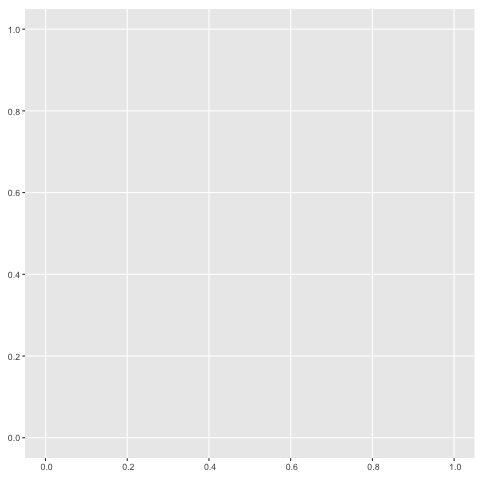

In [69]:
%%R -i gdf_merge

#map gdf_merge counts

# gdf_merge <- read_csv('gdf.csv',show_col_types = FALSE)

gdf_merge %>% 
    ggplot() +
    geom_sf(aes(geometry = geometry, fill=pov_level_estimate)) 
    # scale_fill_viridis_c() +
    # theme_minimal() +
    # theme(legend.position = "bottom") +
    # labs(title="Tobacco Retailers in NYC by Census Tract", fill="Counts") +
    # theme(legend.position="bottom")
